### Create new index

In [ ]:
import idi.simulation as sim
import numpy as np
import pandas as pd
import glob
def stats(csettings,N): 
    Nspheres=csettings.get('Nspheres',np.inf)
    simobject=sim.simobj.multisphere(E=csettings['E'], Natoms=csettings['Natoms'], rsphere=csettings['r']*1e-3, fwhmfocal=csettings['fwhmfocal'], spacing=csettings['spacing'],Nspheres=Nspheres)
    debugs=[]
    for i in range(N):
        simobject.get()
        debugs.append(simobject._debug)
    debugs=np.mean(np.array(debugs),axis=0)
    meanSpheres=int(round(debugs[0]))
    meanAtomPerSphere=int(round(debugs[-1],-1))
    return (meanSpheres,meanAtomPerSphere)

settings=[]
for f in sorted(glob.glob('idi-*.npz')):
    t=np.load(f,allow_pickle=True)
    csettings=t['settings'][0]
    csettings['Nimg']=len(t['result'])
    csettings['idi']=f
    cdi=glob.glob('c'+f[1:])
    if len(cdi)!=1: 
        print('missing cdi, skipping',f)
        continue
        
    tc=np.load(cdi[0],allow_pickle=True)
    if tc['settings'][0]['rndphase'] or not t['settings'][0]['rndphase']:
        raise ValueError
    csettings['cdi']=cdi[0]
    csettings['Nimg_cdi']=len(tc['result'])
   
    meanSpheres,meanAtomPerSphere=stats(csettings,10)
    csettings['meanSpheres']=meanSpheres
    csettings['meanAtomPerSphere']=meanAtomPerSphere
    if not 'Nspheres' in csettings:
        csettings['Nspheres']=np.inf
    if 'mean_per_sphere' in csettings:
        del csettings['mean_per_sphere']
    del csettings['rotangles']
    del csettings['a']
    del csettings['rndphase']
    csettings['simtype']=''.join(t['settings'][1][0])
    print(csettings)
    settings.append(csettings)
    t=None
    tc=None
    #print(t)
    
    
df=pd.DataFrame.from_dict(settings)
newkeys=['simtype','r','Natoms','spacing','fwhmfocal','meanAtomPerSphere','Nspheres','meanSpheres','detz','E','Ndet','pixelsize','Nimg','Nimg_cdi','idi','cdi']
df=df[newkeys].sort_values(['spacing','fwhmfocal','Natoms']).reset_index(drop=True)
df.to_pickle('index.pkl')
df

### Update index

In [ ]:
import pandas as pd
try: 
    df
except:
    df=pd.read_pickle('index.pkl')

In [14]:
import idi.simulation as sim

import numpy as np
import pandas as pd
import glob
def stats(csettings,N): 
    Nspheres=csettings.get('Nspheres',np.inf)
    simobject=sim.simobj.multisphere(E=csettings['E'], Natoms=csettings['Natoms'], rsphere=csettings['r']*1e-3, fwhmfocal=csettings['fwhmfocal'], spacing=csettings['spacing'],Nspheres=Nspheres)
    debugs=[]
    for i in range(N):
        simobject.get()
        debugs.append(simobject._debug)
    debugs=np.mean(np.array(debugs),axis=0)
    meanSpheres=int(round(debugs[0]))
    meanAtomPerSphere=int(round(debugs[-1],-1))
    return (meanSpheres,meanAtomPerSphere)

settings=[]
df=pd.read_pickle('index.pkl')
for f in sorted(glob.glob('idi-*.npz')):
    row=df.loc[df['idi']==f]
    if len(row)==0:
        t=np.load(f,allow_pickle=True)
        csettings=t['settings'][0]
        csettings['Nimg']=len(t['result'])
        csettings['idi']=f
        cdi=glob.glob('c'+f[1:])
        if len(cdi)!=1: 
            print('missing cdi, skipping',f)
            continue

        tc=np.load(cdi[0],allow_pickle=True)
        if tc['settings'][0]['rndphase'] or not t['settings'][0]['rndphase']:
            raise ValueError
        csettings['cdi']=cdi[0]
        csettings['Nimg_cdi']=len(tc['result'])
        csettings['simtype']=''.join(t['settings'][1][0])
        if csettings['simtype']=='multisphere':
            meanSpheres,meanAtomPerSphere=stats(csettings,10)
            csettings['meanSpheres']=meanSpheres
            csettings['meanAtomPerSphere']=meanAtomPerSphere
        elif csettings['simtype']=='sphere':
            csettings['meanSpheres']=1
            csettings['meanAtomPerSphere']=csettings['Natoms']
            csettings['fwhmfocal']=np.nan
            csettings['spacing']=np.nan
        else:
            raise ValueError('unknown simtype')
            
        if not 'Nspheres' in csettings:
            csettings['Nspheres']=np.inf
        if 'mean_per_sphere' in csettings:
            del csettings['mean_per_sphere']
        del csettings['rotangles']
        del csettings['a']
        del csettings['rndphase']
        csettings['simtype']=''.join(t['settings'][1][0])
        print(csettings)
        settings.append(csettings)
        t=None
        tc=None
        #print(t)
if len(settings)==0:   
    print('no new files')
    dfnew=None
else:
    dfnew=pd.DataFrame.from_dict(settings)
    newkeys=['simtype','r','Natoms','spacing','fwhmfocal','meanAtomPerSphere','Nspheres','meanSpheres','detz','E','Ndet','pixelsize','Nimg','Nimg_cdi','idi','cdi']
    dfnew=dfnew[newkeys].sort_values(['spacing','fwhmfocal','Natoms']).reset_index(drop=True)
    df=df.append(dfnew).reset_index(drop=True)
#df.to_pickle('index.pkl')
df

{'Natoms': 4000000, 'Ndet': 1024, 'detz': 30, 'Nimg': 200, 'r': 20, 'pixelsize': 50, 'E': 6400, 'spacing': 0.005, 'fwhmfocal': 0.2, 'Nspheres': 100, 'meanAtomPerSphere': 40000, 'meanSpheres': 100, 'idi': 'idi-r20-100spheres-200focal-5spacing-40kpersphere-multi0.npz', 'cdi': 'cdi-r20-100spheres-200focal-5spacing-40kpersphere-multi0.npz', 'Nimg_cdi': 20, 'simtype': 'multisphere'}
{'Natoms': 80000, 'Ndet': 1024, 'detz': 30, 'Nimg': 200, 'r': 20, 'pixelsize': 50, 'E': 6400, 'spacing': 0.005, 'fwhmfocal': 0.2, 'Nspheres': 2, 'meanAtomPerSphere': 40000, 'meanSpheres': 2, 'idi': 'idi-r20-2spheres-200focal-5spacing-40kpersphere-multi0.npz', 'cdi': 'cdi-r20-2spheres-200focal-5spacing-40kpersphere-multi0.npz', 'Nimg_cdi': 20, 'simtype': 'multisphere'}


,simtype,r,Natoms,spacing,fwhmfocal,meanAtomPerSphere,Nspheres,meanSpheres,detz,E,Ndet,pixelsize,Nimg,Nimg_cdi,idi,cdi,result,plot
0,multisphere,20,50000,0.001,0.10,9990,5.0,5,30,6400,1024,50,400,20,idi-r20-5spheres-100focal-1spacing-multi0.npz,cdi-r20-5spheres-100focal-1spacing-multi0.npz,results-r20-5spheres-100focal-1spacing-multi0.npz,results-r20-5spheres-100focal-1spacing-multi0.png
1,multisphere,20,100000,0.001,0.10,9990,10.0,10,30,6400,1024,50,400,40,idi-r20-10spheres-100focal-1spacing-multi0.npz,cdi-r20-10spheres-100focal-1spacing-multi0.npz,results-r20-10spheres-100focal-1spacing-multi0...,results-r20-10spheres-100focal-1spacing-multi0...
2,multisphere,20,300000,0.001,0.10,10190,30.0,30,30,6400,1024,50,400,40,idi-r20-30spheres-100focal-1spacing-multi0.npz,cdi-r20-30spheres-100focal-1spacing-multi0.npz,results-r20-30spheres-100focal-1spacing-multi0...,results-r20-30spheres-100focal-1spacing-multi0...
3,multisphere,20,1000000,0.001,0.10,20700,50.0,48,30,6400,1024,50,200,20,idi-r20-1e6atoms-100focal-1spacing-multi0.npz,cdi-r20-1e6atoms-100focal-1spacing-multi0.npz,results-r20-1e6atoms-100focal-1spacing-multi0.npz,results-r20-1e6atoms-100focal-1spacing-multi0.png
4,multisphere,20,1000000,0.001,0.15,10000,100.0,100,30,6400,1024,50,200,20,idi-r20-100spheres-150focal-1spacing-multi0.npz,cdi-r20-100spheres-150focal-1spacing-multi0.npz,results-r20-100spheres-150focal-1spacing-multi...,results-r20-100spheres-150focal-1spacing-multi...
5,multisphere,20,1000000,0.001,0.20,20000,50.0,50,30,6400,1024,50,200,20,idi-r20-1e6atoms-200focal-1spacing-Nspheres50-...,cdi-r20-1e6atoms-200focal-1spacing-Nspheres50-...,results-r20-1e6atoms-200focal-1spacing-Nsphere...,results-r20-1e6atoms-200focal-1spacing-Nsphere...
6,multisphere,20,10000000,0.001,0.20,25980,500.0,385,30,6400,1024,50,200,20,idi-r20-1e7atoms-200focal-1spacing-multi0.npz,cdi-r20-1e7atoms-200focal-1spacing-multi0.npz,results-r20-1e7atoms-200focal-1spacing-multi0.npz,results-r20-1e7atoms-200focal-1spacing-multi0.png
7,multisphere,20,600000,0.005,0.10,20290,inf,30,30,6400,1024,50,200,20,idi-r20-6e5atoms-100focal-5spacing-multi0.npz,cdi-r20-6e5atoms-100focal-5spacing-multi0.npz,results-r20-6e5atoms-100focal-5spacing-multi0.npz,results-r20-6e5atoms-100focal-5spacing-multi0.png
8,multisphere,20,120000,0.005,0.20,40040,3.0,3,30,6400,1024,50,200,20,idi-r20-3spheres-200focal-5spacing-40kperspher...,cdi-r20-3spheres-200focal-5spacing-40kperspher...,results-r20-3spheres-200focal-5spacing-40kpers...,results-r20-3spheres-200focal-5spacing-40kpers...
9,multisphere,20,5000000,0.005,0.20,21950,inf,228,30,6400,1024,50,200,40,idi-r20-5e6atoms-200focal-5spacing-multi0.npz,cdi-r20-5e6atoms-200focal-5spacing-multi0.npz,results-r20-5e6atoms-200focal-5spacing-multi0.npz,results-r20-5e6atoms-200focal-5spacing-multi0.png


### Plot

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


(100,) (100,) (100,)


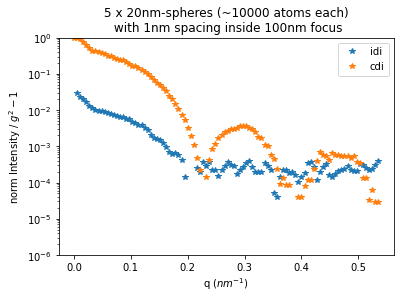

(100,) (100,) (100,)


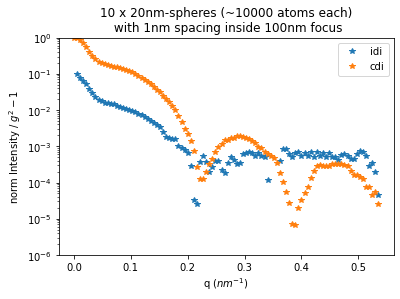

(100,) (100,) (100,)


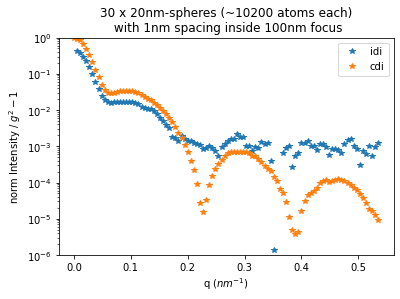

(100,) (100,) (100,)


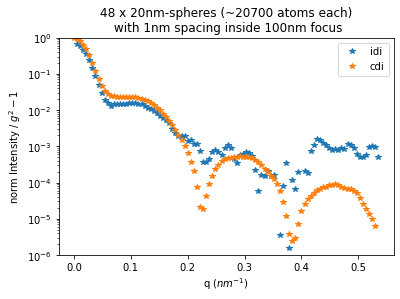

(100,) (100,) (100,)


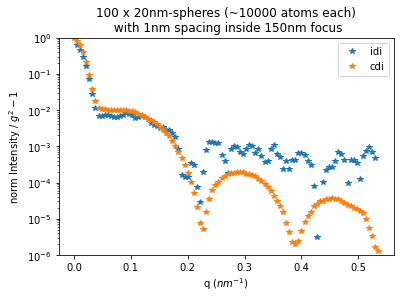

(100,) (100,) (100,)


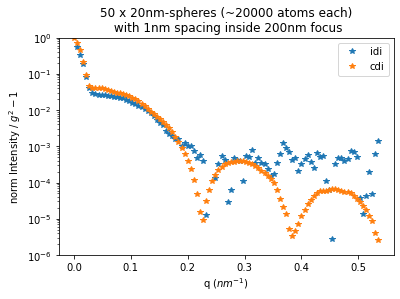

(100,) (100,) (100,)


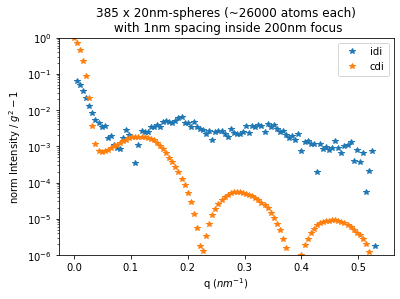

(100,) (100,) (100,)


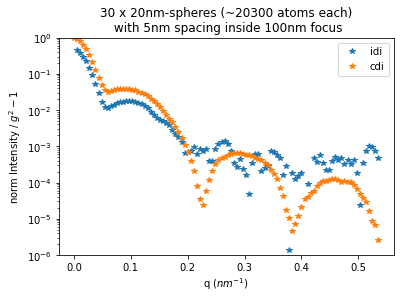

(100,) (100,) (100,)


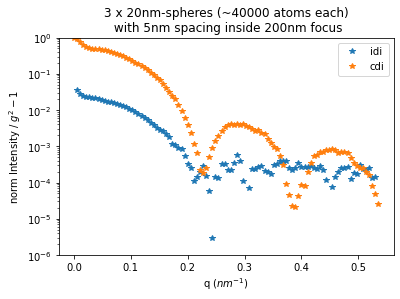

(100,) (100,) (100,)


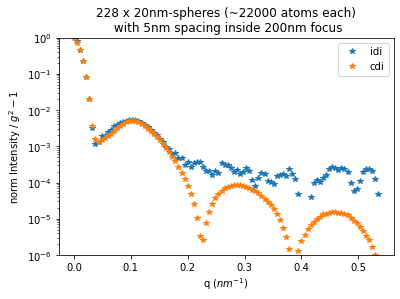

(100,) (100,) (100,)


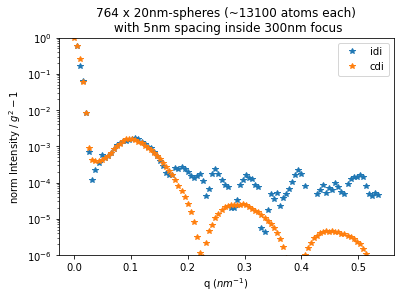

(100,) (100,) (100,)


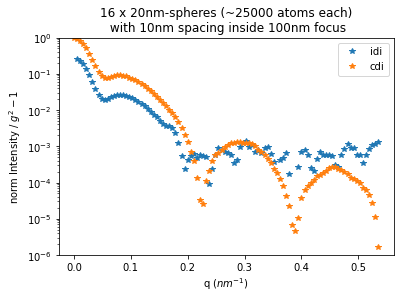

(100,) (100,) (100,)


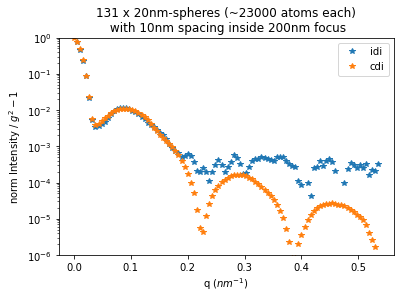

(100,) (100,) (100,)


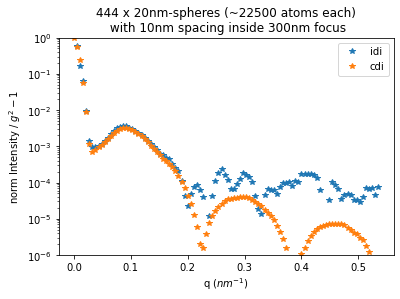

(100,) (100,) (100,)


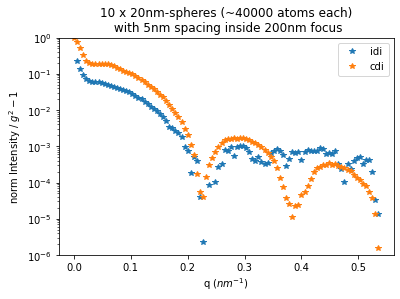

(100,) (100,) (100,)


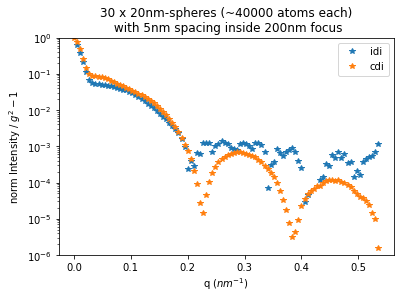

(100,) (100,) (100,)


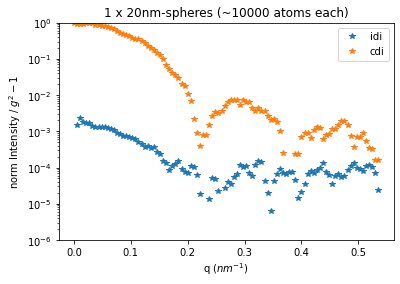

(100,) (100,) (100,)


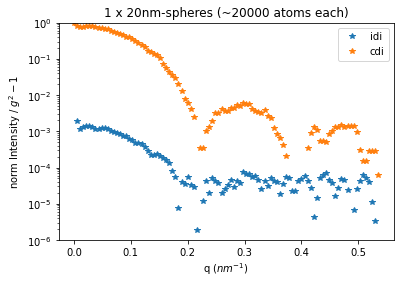

(100,) (100,) (100,)


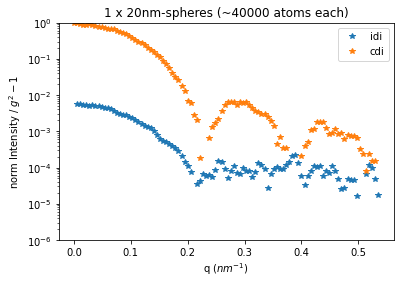

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide



(100,) (100,) (100,)


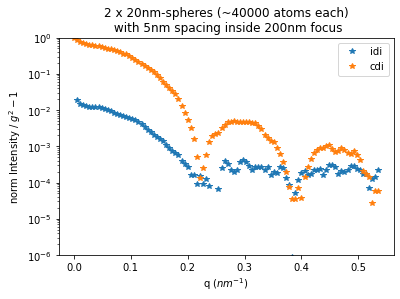

(100,) (100,) (100,)


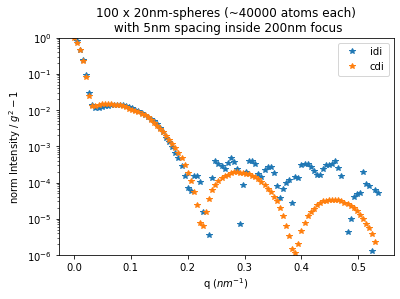

In [15]:
import idi.reconstruction as recon
from idi.util import radial_profile
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import numpy as np
import matplotlib.pyplot as plt
import os.path
import scipy.signal as ss



def result(row):
    def photons(wf,Natoms,factor=100):
        photonnorm=Natoms/np.mean(np.sum(wf,axis=(1,2)))/factor
        photons=np.random.poisson(wf*photonnorm).astype(np.float64)
        return photons
    resultfn=f"results-{row['idi'][4:]}"
    try:
        r=np.load(resultfn)
        resultcdi=r['resultcdi']
        resultidi=r['resultidi']
    except:
        z=(row['detz']*1e-2)/(row['pixelsize']*1e-6)
        wfidi=np.load(row['idi'])['result']
        photonsidi=photons(wfidi,row['Natoms'])
        mean=np.mean(photonsidi,axis=0)
        invmean=1/mean
        invmean[mean==0]=0
        with recon.qcorrad.corrfunction(mean.shape,z,125) as f:
            norm=1/(f(np.ones_like(mean))*len(photonsidi))
            resultidi=sum(f(img*invmean)*norm for img in tqdm(photonsidi))[:100]

        wfcdi=np.load(row['cdi'])['result']
        photonscdi=photons(wfcdi,row['Natoms'])
        resultcdi=radial_profile(np.mean(photonscdi,axis=0))[:100]
        np.savez_compressed(resultfn,resultidi=resultidi,resultcdi=resultcdi,settings=row.to_dict())
    
    plotfn=resultfn[:-3]+'png'
    
    E=row['E']
    k = 2 * np.pi / (1.24 / E) / 1000
    x=np.arange(0,len(resultcdi))
    z=z=(row['detz']*1e-2)/(row['pixelsize']*1e-6)
    t=np.arctan(x/z)/2
    q=2*k*np.sin(t)
    print(q.shape,resultcdi.shape,resultidi.shape)
    #resultidi[0]=np.nan
    fresultcdi=ss.savgol_filter(resultcdi,3,1)
    fresultidi=ss.savgol_filter(resultidi,3,1)
    fresultidi[:3]=resultidi[:3]
    fresultidi=fresultidi-min(1,np.nanpercentile(fresultidi,2))
    fresultidi[fresultidi<0]=np.nan
    plt.semilogy(q[:len(fresultidi)],fresultidi,'*',label='idi')
    plt.semilogy(q[:len(fresultcdi)],fresultcdi/np.nanmax(fresultcdi),'*',label='cdi')
    title=f"{row['meanSpheres']} x {row['r']}nm-spheres (~{round(row['meanAtomPerSphere'],-2)} atoms each)"
    if not np.isnan(row['spacing']): title+=f"\n with {int(row['spacing']*1e3)}nm spacing inside {int(row['fwhmfocal']*1000)}nm focus"
    plt.legend()
    plt.title(title)
    plt.xlabel('q ($nm^{-1}$)')
    plt.ylabel('norm Intensity / $g^2-1$')
    plt.ylim(1e-6,1)
    plt.savefig(plotfn)
    plt.show()
    return resultfn,plotfn

#df=pd.read_pickle('index.pkl')
df['result'],df['plot']=zip(*df.progress_apply(result,axis=1))
#df.to_pickle('index.pkl')

In [ ]:
from jinja2 import Template

template = Template(r'''
\documentclass{article}
\usepackage[margin=0.7in]{geometry}
\usepackage[parfill]{parskip}
\usepackage[utf8]{inputenc}
\usepackage{booktabs}
\usepackage{graphicx}

\usepackage{amsmath,amssymb,amsfonts,amsthm}

\begin{document}



\section*{Simulation Settings}
{{descr}}

{{table}}

\section*{Plots}


{% for image in images %}
\begin{figure}[h]
\centering
\includegraphics[height=5cm]{% raw -%}{{%- endraw %}{{image.file}}{% raw -%}}{%- endraw %}
\caption{ {{image.caption}} }
\end{figure}
{% endfor %}
\end{document}

''')
from collections import namedtuple
images=[]
for i,row in df.iterrows():
    image=namedtuple('images', ['file', 'caption'])
    if row['simtype']=='multisphere':
        caption=f"{row['meanSpheres']} x {row['r']}nm-spheres (~{round(row['meanAtomPerSphere'],-2)} atoms each) \n with {int(row['spacing']*1e3)}nm spacing inside {int(row['fwhmfocal']*1000)}nm focus"
    elif row['simtype']=='sphere': 
        caption=f"{row['r']}nm-sphere (~{round(row['meanAtomPerSphere'],-2)} atoms)"
    file=row['plot']
    images.append(image(file=file,caption=caption))
descr='All with 20nm radius, 30cm detector distance, 1024x1024@50um pixels and 6.4keV'
columns=['simtype', 'Natoms', 'spacing', 'fwhmfocal', 'meanAtomPerSphere', 'Nspheres', 'meanSpheres', 'Nimg', 'Nimg_cdi']
tmp=df.copy()
tmp.index+=1
tmp.spacing*=1e-3
tmp.fwhmfocal*=1e-3
tmp.loc[tmp['Nspheres']==np.inf,'Nspheres']=-1
tmp['Nspheres']=tmp['Nspheres'].astype(int)
table=tmp[columns].to_latex(float_format="%.1e")
with open(r"index.tex","w") as f:
    f.write(template.render(table=table,images=images,descr=descr))
!xelatex  index.tex 1 >/dev/null